In [2]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [5]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [6]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [ ]:
log = lammps_logfile.File("water.log")
timestep = 1 # fs
time = log.get("Step", run_num=1)*timestep/1000 # ps
rho = log.get("Density", run_num=1) # g/cm3
temp = log.get("Temp", run_num=1) # K

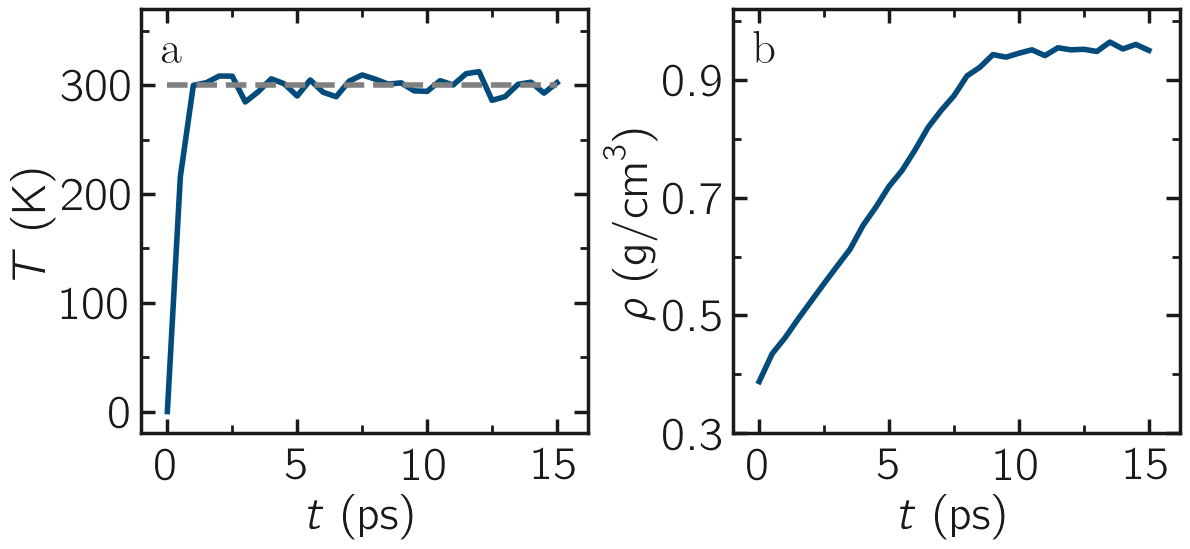

In [17]:
filename = "PEG-density"
# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5.6), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = time, y = temp, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
x = np.linspace(0, 15)
myplt.add_plot(x = x, y = x*0+300, type = "plot", linewidth_data = 1.5,
               marker = "--", data_color = color4, markersize = 12)
myplt.complete_panel(ylabel = r'$T ~ \mathrm{(K)}$',
                     xlabel = r'$t~\mathrm{(ps)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 16, 5), y_ticks=np.arange(0, 360, 100),
                    x_boundaries=(-1, 16.2), y_boundaries=(-20, 370))

# Panel b
myplt.add_panel()
myplt.add_plot(x = time, y = rho, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
#x = np.linspace(0, 15)
#myplt.add_plot(x = x, y = x*0+996, type = "plot", linewidth_data = 1.5,
#               marker = "--", data_color = color4, markersize = 12)
myplt.complete_panel(ylabel = r'$\rho ~ (\mathrm{g/cm}^3)$',
                     xlabel = r'$t~\mathrm{(ps)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 16, 5), y_ticks=np.arange(0.3, 1.100, 0.200),
                    x_boundaries=(-1, 16.2), y_boundaries=(0.35, 1.020))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)